# Classificação de furacões

## Análise estatística de dados.
 - *Encontre os dez principais furacões por frequência.*
 - *Encontre a frequência de furacões por mês.*
 - *Encontre a frequência de furacões por ano.*
 - *Encontre a frequência de furacões por categoria.*



In [1]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# O status pode ser dos seguintes tipos:
# TD – Ciclone tropical de intensidade de depressão tropical (< 34 nós)
# TS – Ciclone tropical de intensidade de tempestade tropical (34-63 nós)
# HU – Ciclone tropical de intensidade de furacão (> 64 nós)
# EX – Ciclone extratropical (de qualquer intensidade)
# SD – Ciclone subtropical de intensidade de depressão subtropical (< 34 nós)
# SS – Ciclone subtropical de intensidade de tempestade subtropical (> 34 nós)
# LO – Uma baixa que não é um ciclone tropical, um ciclone subtropical, nem um ciclone extratropical (de qualquer intensidade)
# WV – Onda Tropical (de qualquer intensidade)
# DB – Perturbação (de qualquer intensidade)

In [3]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

In [4]:
# Carregando os dados
df = pd.read_csv('/content/pacific.csv')

In [5]:
df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Converter coluna de data como data e hora
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

In [7]:
df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Criar colunas Latitude Hemisphere e Longitude Hemisphere com código 0 = N , 1 = S & 0 = E , 1 = W.
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Criando a coluna Latitude_Hemisphere    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

# Converte a coluna de latitude e longitude em tipo numérico
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

# Os valores ausentes são dados por -999. Portanto, precisamos preenchê-los adequadamente.

# Mostrar a contagem de valores ausentes e preenchê-los com a média.
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(df[column][df[column] != -999 ].mean())
#         print("mean",mean)
        index = df.loc[df[column] == -999 , column].index
#         print("index" , index )
        df.loc[df[column] == -999 , column] = mean
#         print(df.loc[index , column])
        
# Restrutura o dataframe para visibilidade e remova as colunas ID e Even      
df =  df[['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Latitude_Hemisphere' , 
       'Longitude', 'Longitude_Hemisphere' ,'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

# Altera time para o formato HHMM
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Aplica a função
df['Time'] = df['Time'].apply(hhmm)

# Converte a coluna em Datetime
df['Time'] = pd.to_datetime(df['Time'] , format='%H%M').dt.time


# Converte a coluna de status em categórica
df['Status'] = df['Status'].astype('category')

data = df.drop(columns = ['ID' , 'Event'])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisp

## Análise estatística dos dados

In [9]:
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,1949-06-12,06:00:00,TS,20.5,0,109.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,1949-06-12,12:00:00,TS,20.6,0,110.2,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,1949-06-17,12:00:00,TS,14.1,0,107.0,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,1949-06-17,18:00:00,TS,14.6,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,1949-06-18,00:00:00,TS,15.0,0,108.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5


In [10]:
data.describe()

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,48.949344,994.997437,40.038643,35.013200,26.989325,35.004782,13.096759,11.095191,8.976929,11.087156,5.071929,4.113517,3.098098,4.881777
std,25.334450,12.945391,24.055514,21.723649,17.820366,23.122758,11.542860,10.218244,8.640888,10.276413,5.977859,5.242294,4.410915,5.357886
min,10.000000,872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,995.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000
50%,45.000000,995.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000
75%,65.000000,1002.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000
max,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


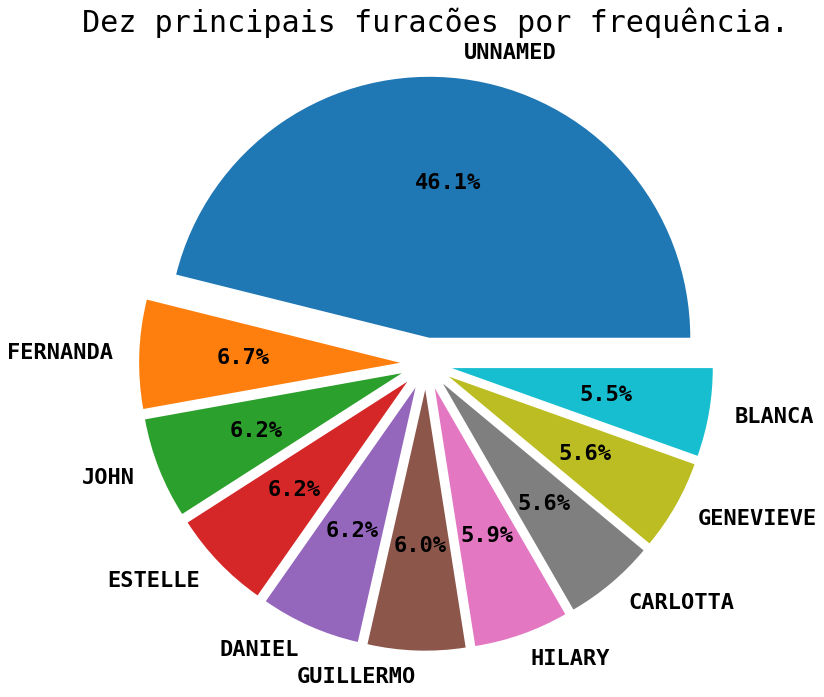

In [11]:
# Encontre os dez principais ciclones que ocorreram o número máximo de vezes
lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Dez principais furacões por frequência.' , fontsize = 30)
plt.show()

## Frequência de furacões por mês

Text(0.5, 1.0, 'Frequência de furacões por mês')

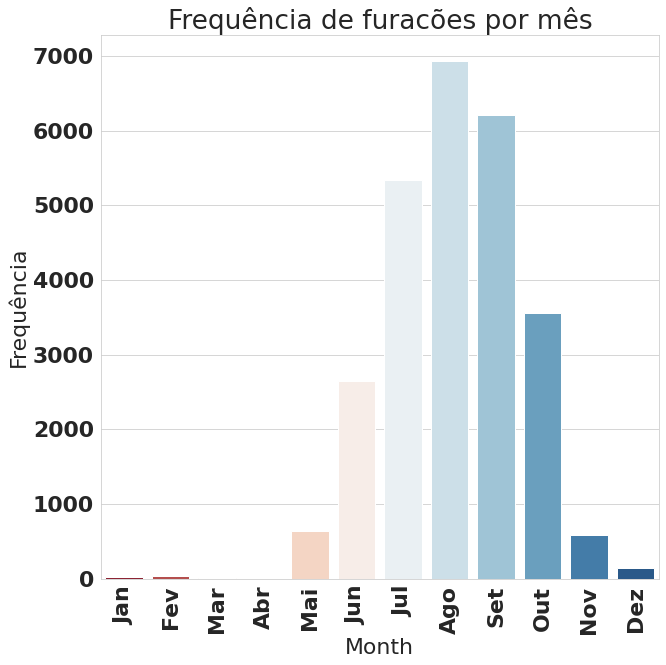

In [12]:
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Fev' , 'Mar' , 'Abr' , 'Mai' , 'Jun' , 'Jul' , 'Ago' , 'Set','Out' , 'Nov' , 'Dez']
temp = data.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequência')
plt.title('Frequência de furacões por mês')

## Frequência de furacões por ano

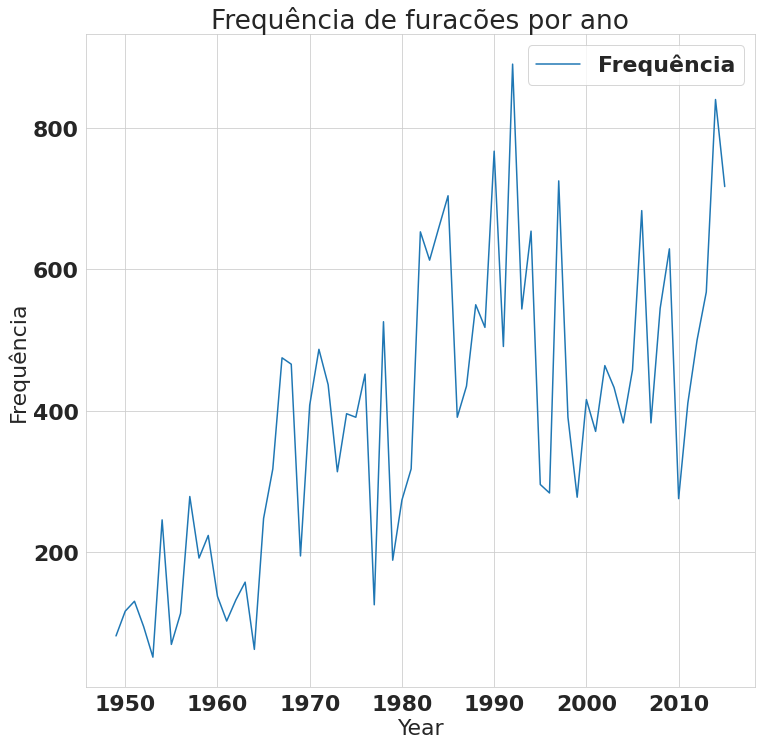

In [13]:
# Frequência Anual de Furacões
temp = data.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequência')
plt.ylabel('Frequência')
plt.title('Frequência de furacões por ano')
plt.show()

<AxesSubplot:xlabel='Distribuição de Probabilidade de Frequência de furacões', ylabel='Density'>

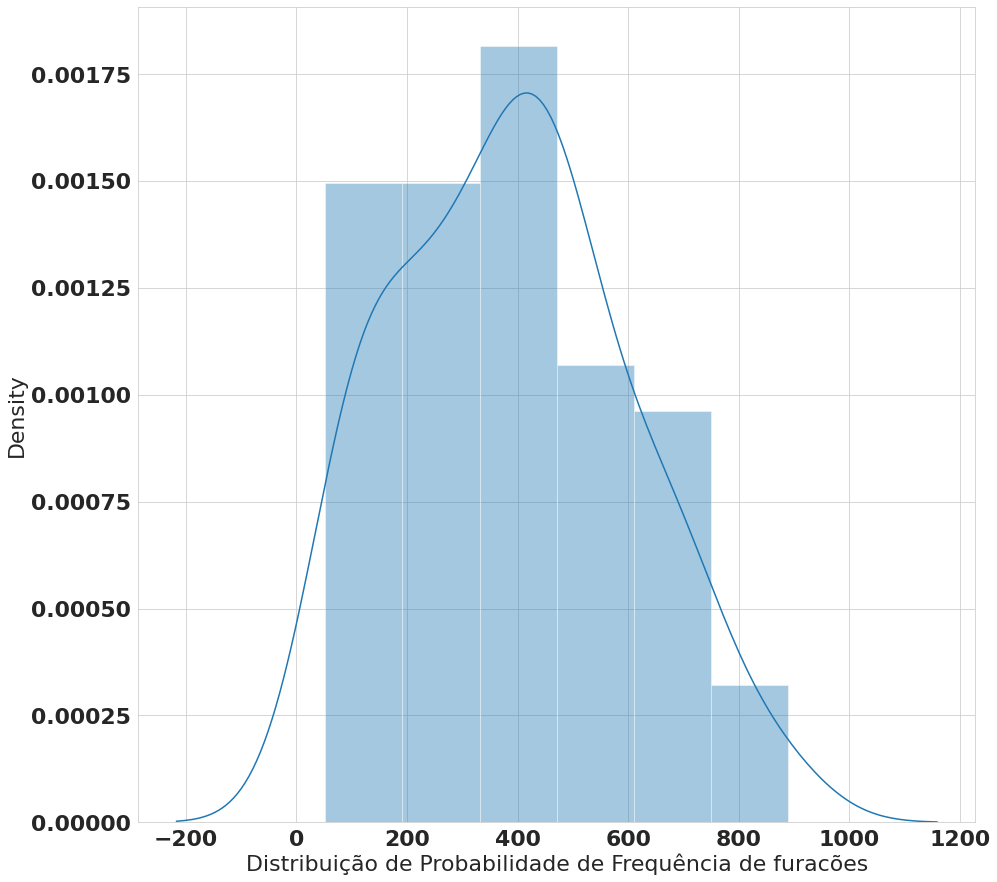

In [14]:
# Função de Distribuição de Probabilidade de Frequência
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Distribuição de Probabilidade de Frequência de furacões')

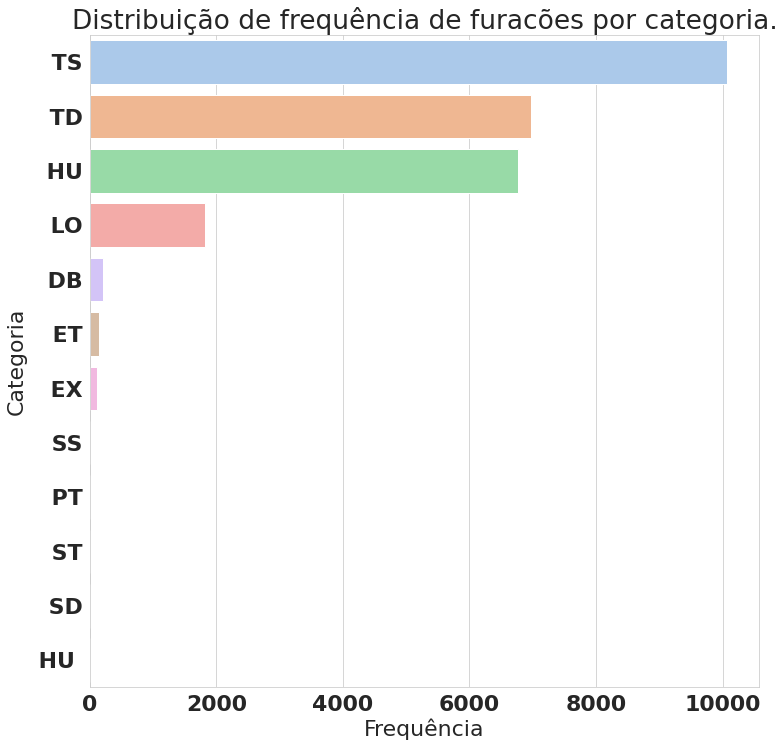

In [15]:
# TD – Ciclone tropical de intensidade de depressão tropical (< 34 nós)
# TS – Ciclone tropical de intensidade de tempestade tropical (34-63 nós)
# HU – Ciclone tropical de intensidade de furacão (> 64 nós)
# EX – Ciclone extratropical (de qualquer intensidade)
# SD – Ciclone subtropical de intensidade de depressão subtropical (< 34 nós)
# SS – Ciclone subtropical de intensidade de tempestade subtropical (> 34 nós)
# LO – Uma baixa que não é um ciclone tropical, um ciclone subtropical, nem um ciclone extratropical (de qualquer intensidade)
# WV – Onda Tropical (de qualquer intensidade)
# DB – Perturbação (de qualquer intensidade)
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequência')
plt.ylabel('Categoria')
plt.title('Distribuição de frequência de furacões por categoria.')
plt.show()

 # Modelo de classificação

## 1. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 

# Criando o modelo
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')


# Definindo as variáveis ​​dependentes e independentes
x_train = data[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW' , 'Month' , 'Year']]
y_train = data['Status']


# Executa a validação do Kfold

# Importe a biblioteca do KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('A Acurácia da Decision Tree é :' , dt_scr['accuracy'])
print('O Recall da Decision Tree é :' , dt_scr['recall'])
print('Precisão da Decision Tree é :' , dt_scr['precision'])

A Acurácia da Decision Tree é : 0.9651068271145011
O Recall da Decision Tree é : 0.9651068271145011
Precisão da Decision Tree é : 0.9639969870825983


## 2. Random Forest.

In [18]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Primeiro, quero determinar os recursos importantes
rf = RandomForestClassifier(oob_score=True , n_estimators=1000)
rf.fit(x_train , y_train)
features = pd.Series(rf.feature_importances_ , index= x_train.columns).sort_values(ascending=False)
features

Maximum Wind            0.636299
Minimum Pressure        0.107660
Latitude                0.038761
Year                    0.038552
Longitude               0.036635
Low Wind NE             0.025147
Low Wind NW             0.019954
Low Wind SE             0.017178
High Wind NE            0.014410
Month                   0.011540
High Wind SE            0.010359
High Wind NW            0.009510
Low Wind SW             0.009448
High Wind SW            0.005920
Moderate Wind SE        0.004656
Moderate Wind SW        0.004035
Moderate Wind NE        0.003830
Moderate Wind NW        0.003801
Longitude_Hemisphere    0.002306
Latitude_Hemisphere     0.000000
dtype: float64

## Criando uma árvore de decisão para os dez recursos mais importantes

In [19]:
# Os dez recursos mais importantes
features.index[:5]

Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude'], dtype='object')

In [20]:
# Defina as variáveis ​​dependentes e independentes
x_trainf = data[features.index[:5]]
y_train = data['Status']

# Execute a validação do Kfold

# Importe a biblioteca do KFold

from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_trainf):
    xtr = x_trainf.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_trainf.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr5 = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('A Acurácia da Decision Tree é :' , dt_scr['accuracy'])
print('O Recall da Decision Tree é :' , dt_scr['recall'])
print('A Precisão da Decision Tree é :' , dt_scr['precision'])

A Acurácia da Decision Tree é : 0.9651068271145011
O Recall da Decision Tree é : 0.9651068271145011
A Precisão da Decision Tree é : 0.9639969870825983


## Como podemos ver, os cinco principais recursos ('Vento Máximo', 'Pressão Mínima', 'Latitude', 'Ano', 'Longitude') fornecem a mesma precisão de quando escolhemos todos os recursos.

## 2 . Random Forest

In [22]:
# Aqui, em vez de validação cruzada, usaremos a pontuação oob como medida de precisão.
# Vou hiperajustar o parâmetro: No of Trees.

trees  = [10, 20 , 50, 100,200,500,1000,1200]
maxn_five = {}
maxn = {}
for i in trees:
    rf = RandomForestClassifier(n_estimators=i , oob_score=True)
    rf.fit(x_trainf , y_train)
    print('Pontuação Obb para {x} árvores: e os principais recursos '.format(x = i) , rf.oob_score_)
    maxn_five[i] = rf.oob_score_
    rf.fit(x_trainf , y_train)
    print('Pontuação Obb para {x} árvores: tendo todos os recursos '.format(x = i) , rf.oob_score_)
    maxn[i] = rf.oob_score_

Pontuação Obb para 10 árvores: e os principais recursos  0.9669051536136511
Pontuação Obb para 10 árvores: tendo todos os recursos  0.9651834564028007
Pontuação Obb para 20 árvores: e os principais recursos  0.9806022114244175
Pontuação Obb para 20 árvores: tendo todos os recursos  0.9813674101847955
Pontuação Obb para 50 árvores: e os principais recursos  0.9830508474576272
Pontuação Obb para 50 árvores: tendo todos os recursos  0.9826682480774381
Pontuação Obb para 100 árvores: e os principais recursos  0.9829360676435704
Pontuação Obb para 100 árvores: tendo todos os recursos  0.9825534682633814
Pontuação Obb para 200 árvores: e os principais recursos  0.9828595477675326
Pontuação Obb para 200 árvores: tendo todos os recursos  0.9829743275815893
Pontuação Obb para 500 árvores: e os principais recursos  0.9829360676435704
Pontuação Obb para 500 árvores: tendo todos os recursos  0.9834717067758351
Pontuação Obb para 1000 árvores: e os principais recursos  0.9832804070857405
Pontuação 

In [23]:
# Dividindo os dados em treinamento e teste
x_trains , x_tests , y_trains, y_tests  = train_test_split(x_trainf, y_train, test_size=0.33, random_state=42)
# Definindo n para o recurso de pontuação oob máxima
n = 0
for i in maxn_five:
    if max(maxn_five.values()) == maxn_five[i]:
        n= i
# Definindo o  n_estimadores para n.
rf = RandomForestClassifier(oob_score=True , n_estimators=n)
rf.fit(x_trains , y_trains)
y_pred_rf = rf.predict(x_tests[features.index[:5]])
scores_rf = {'accuracy': accuracy_score(y_tests , y_pred_rf) ,'recall' : recall_score(y_tests , y_pred_rf , average='weighted') ,'precision' : precision_score(y_tests , y_pred_rf , average='weighted') }
print('Pontuações para Random Forest com n = ' , n , ' e usando recursos ',  features.index[:5] , ' são : ')
print('Acurácia: ' , scores_rf['accuracy'])
print('Recall: ' , scores_rf['recall'])
print('Precisão: ' , scores_rf['precision'])

Pontuações para Random Forest com n =  1200  e usando recursos  Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude'], dtype='object')  são : 
Acurácia:  0.9809877115696731
Recall:  0.9809877115696731
Precisão:  0.980494062354018
